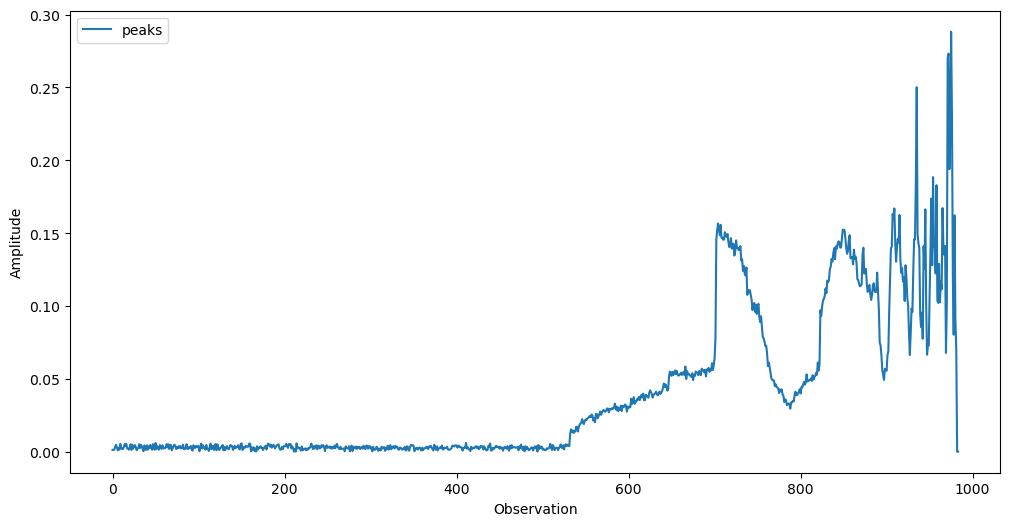

In [2]:
#This code was submitted as an assignment for CS4020 course in 2023 in University of South Eastern Norway (USN)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.signal import filtfilt, hilbert, butter, sosfilt
from scipy.fft import fft, fftfreq


#This part of code is adapted from the following github repository : https://github.com/yellowsimulator/bearing_watcher/tree/main/bearing_watcher
def demodulation(path, fs, lowcut, highcut, date):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    order = 2
    sos = butter(order, [low, high], btype='bandpass', output='sos')

    dataset = pd.read_csv(path + '/' + date, sep='\t', header=None)
    y = sosfilt(sos, dataset[0], axis=0)

    analytic_signal = hilbert(y)
    amplitude_envelope = np.abs(analytic_signal)

    low_sos = butter(order, low, btype='low', output='sos')
    l = sosfilt(low_sos, amplitude_envelope, axis=0)

    yf = fft(l)
    amplitude = 2.0 / fs * np.abs(yf[0:fs//2])

    return fftfreq(fs, 1/fs)[:fs//2], amplitude


#This part of code is adapted from the following github repository : https://github.com/yellowsimulator/bearing_watcher/tree/main/bearing_watcher
def get_peak(freqs, amplitudes, expected_freq, search_range=1):
    min_index = np.where(freqs > (expected_freq - search_range))[0][0]
    max_index = np.where(freqs < (expected_freq + search_range))[0][-1]

    peak_amplitude = max(amplitudes[min_index:max_index])
    
    return peak_amplitude

path = "C:/users/zahra/Bearing/datasets/2nd_test"
dates = os.listdir(path)

fs = 20000
lowcut = 2000
highcut = 9900
expected_freq = 236.4

b1_peaks = []
for date in dates:
    frequency, amplitude = demodulation(path, fs, lowcut, highcut, date)
    peak1 = get_peak(frequency, amplitude, expected_freq)
    b1_peaks.append(peak1)

# Plotting high peaks within the bearing
plt.plot(b1_peaks, label='peaks')
plt.legend()
plt.xlabel('Observation')
plt.ylabel('Amplitude')
fig = plt.gcf()
fig.set_size_inches(12, 6)
dpi = fig.get_dpi()
fig.savefig('detectionbearing1.jpg', dpi=dpi, bbox_inches='tight')
plt.show()
